# Inital Analysis of My LA 311 Data

                                                    Michael Gonzalez

In this notebook, I'm planning to look at the 2020 data of my LA 311 service requests. I want to look at the data and make plots of the different services used. I understand that others have done something similar in the past years. This could lead other projects that compares the year over year usage. 

In [20]:
# Importing the needed libraries.
import pandas as pd
import numpy as np
import pandas_profiling
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data frame.
m311 = pd.read_csv('...\MyLA311_Service_Request_Data_2020.csv')

# Displaying the first five rows of the data frame.
m311.head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-1523593381,01/01/2020 12:02:00 AM,01/07/2020 12:19:00 PM,SR Created,BOS,Illegal Dumping Pickup,Closed,Call,BOS,NaN,...,"(33.988984265, -118.302681205)",673,J,5.0,South Los Angeles APC,8.0,Marqueece Harris-Dawson,81.0,EMPOWERMENT CONGRESS CENTRAL AREA NDC,77TH STREET
1,1-1523590121,01/01/2020 12:05:00 AM,01/02/2020 08:43:00 AM,SR Created,BOS,Illegal Dumping Pickup,Closed,Call,BOS,NaN,...,"(34.1940284578, -118.499471638)",531,D,6.0,South Valley APC,6.0,Nury Martinez,19.0,LAKE BALBOA NC,WEST VALLEY
2,1-1523596201,01/01/2020 12:16:00 AM,01/02/2020 03:13:00 PM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Self Service,Android,...,"(34.0117235893, -118.312764174)",673,H,2.0,South Los Angeles APC,8.0,Marqueece Harris-Dawson,77.0,EMPOWERMENT CONGRESS NORTH AREA NDC,SOUTHWEST
3,1-1523596222,01/01/2020 12:19:00 AM,01/03/2020 07:02:00 AM,SR Created,BOS,Bulky Items,Closed,Mobile App,Self Service,Android,...,"(34.0724397675, -118.287797874)",634,A,1.0,Central APC,13.0,Mitch O'Farrell,53.0,RAMPART VILLAGE NC,OLYMPIC
4,1-1523591123,01/01/2020 12:21:00 AM,01/03/2020 03:54:00 PM,SR Created,BOS,Metal/Household Appliances,Closed,Mobile App,Self Service,Android,...,"(34.0724397675, -118.287797874)",634,A,1.0,Central APC,13.0,Mitch O'Farrell,53.0,RAMPART VILLAGE NC,OLYMPIC


## Closer Look at the Data

In [21]:
# Looking at the data frame's shape.
m311.shape

(1491773, 34)

In [22]:
# Looking at the created date's na.
m311.CreatedDate.isna().sum()

0

In [23]:
# Looking at the closed date's na.
m311.ClosedDate.isna().sum()

7246

In [24]:
# Looking at the service date's na.
m311.ServiceDate.isna().sum()

73623

In [6]:
# Looking at the status column for open requests. 
m311_open = m311[m311.Status == 'Open']
m311_open.shape

(1749, 34)

In [25]:
# Displaying all open-status request that are based on service and created dates.
m311_notServiced = m311_open[m311_open.ServiceDate.isna() & m311_open.CreatedDate.notna()]
m311_notServiced.shape

(1443, 36)

In [26]:
# Displaying all open-status rrequest that based on closed dates and created dates.
m311_notClosed = m311_open[m311_open.ClosedDate.isna() & m311_open.CreatedDate.notna()]
m311.shape

(1491773, 34)

## Data Transformation 

In [27]:
# Adding new columns with removed na from the listed columns. 
dt_cols = ['CreatedDate','UpdatedDate','ServiceDate','ClosedDate']

for col in dt_cols:
    m311[col] = pd.to_datetime(m311_open[col])
    
m311_open['ClosedDate_open'] = m311_open['ClosedDate'].replace(to_replace = pd.NaT, value = datetime.now())
m311_open['ServiceDate_open'] = m311_open['ServiceDate'].replace(to_replace = pd.NaT, value = datetime.now())

In [30]:
def dt_to_days(dt):
    if not pd.isnull(dt):
        num_days = pd.Timedelta.total_seconds(dt)/(24.*3600)
        if num_days <= .000001:
            return 0
        return pd.Timedelta.total_seconds(dt)/(24.*3600)
    else:
        return np.NaN

m311_open['ClosedDiff'] = m311_open.ClosedDate_open - m311.CreatedDate
m311_open['ServiceDiff'] = m311_open.ClosedDate_open - m311.CreatedDate
m311_open['ClosedServiceDiff'] = m311_open.ClosedDate_open - m311.CreatedDate
m311_open['ClosedDiff_Days'] = m311_open.ClosedDiff.apply(dt_to_days)
m311_open['ServiceDiff_Days'] = m311_open.ServiceDiff.apply(dt_to_days)
m311_open['ClosedServiceDiff_Days'] = m311_open.ClosedServiceDiff.apply(dt_to_days)


In [31]:
# Displaying the new columns in the data frame.
m311_open.head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,NCName,PolicePrecinct,ClosedDate_open,ServiceDate_open,ClosedDiff,ServiceDiff,ClosedServiceDiff,ClosedDiff_Days,ServiceDiff_Days,ClosedServiceDiff_Days
1724,1-1523805332,01/02/2020 02:37:00 AM,02/06/2020 04:31:00 PM,SR Created,BSL,Multiple Streetlight Issue,Open,Mobile App,Self Service,Android,...,PACOIMA NC,FOOTHILL,2021-06-29 11:48:37.479531,2021-06-29 11:48:37.480529,544 days 09:11:37.479531,544 days 09:11:37.479531,544 days 09:11:37.479531,544.383073,544.383073,544.383073
4511,1-1524259631,01/02/2020 12:43:00 PM,02/11/2020 03:45:00 AM,SR Created,BOS,Illegal Dumping Pickup,Open,Driver Self Report,Proactive Insert,NaN,...,NaN,NaN,2021-06-29 11:48:37.479531,2021-06-29 11:48:37.480529,543 days 23:05:37.479531,543 days 23:05:37.479531,543 days 23:05:37.479531,543.962239,543.962239,543.962239
8153,1-1524870371,01/03/2020 09:23:00 AM,01/03/2020 09:23:00 AM,SR Created,OCB,Graffiti Removal,Open,Self Service,Self Service,NaN,...,BOYLE HEIGHTS NC,HOLLENBECK,2021-06-29 11:48:37.479531,2021-06-29 11:48:37.480529,543 days 02:25:37.479531,543 days 02:25:37.479531,543 days 02:25:37.479531,543.101128,543.101128,543.101128
8159,1-1524870561,01/03/2020 09:24:00 AM,01/03/2020 09:24:00 AM,SR Created,OCB,Graffiti Removal,Open,Self Service,Self Service,NaN,...,BOYLE HEIGHTS NC,HOLLENBECK,2021-06-29 11:48:37.479531,2021-06-29 11:48:37.480529,543 days 02:24:37.479531,543 days 02:24:37.479531,543 days 02:24:37.479531,543.100434,543.100434,543.100434
8347,1-1524910655,01/03/2020 09:55:00 AM,01/03/2020 09:55:00 AM,SR Created,OCB,Graffiti Removal,Open,Mobile App,Self Service,iOS,...,MACARTHUR PARK NC,RAMPART,2021-06-29 11:48:37.479531,2021-06-29 11:48:37.480529,543 days 01:53:37.479531,543 days 01:53:37.479531,543 days 01:53:37.479531,543.078906,543.078906,543.078906


## Data Visualizations 

Text(0, 0.5, 'Count of Calls')

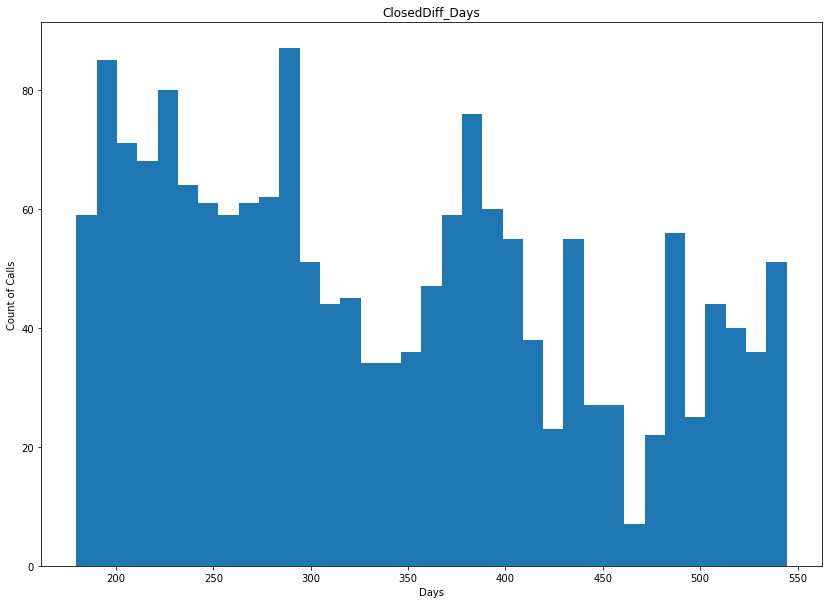

In [32]:
# Displaying ongoing service requests from the closed diff column.
m311_open.hist(column = 'ClosedDiff_Days', bins = 35, figsize = (14, 10))
plt.grid(False)
plt.xlabel('Days')
plt.ylabel('Count of Calls')

Text(0, 0.5, 'Count of Calls')

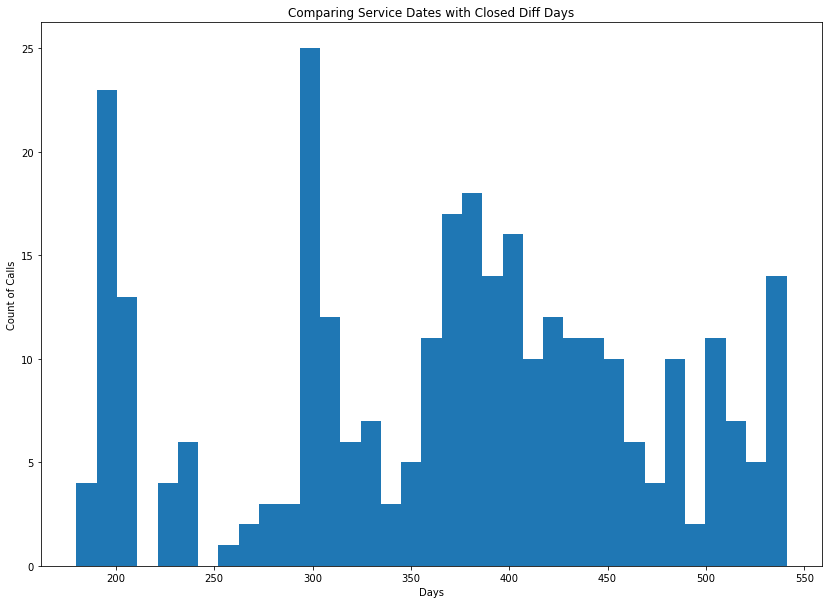

In [33]:
# Comparing the open service date column with the closed diff column. 
m311_open.loc[m311_open.ServiceDate.notna(), 'ClosedDiff_Days'].plot.hist(bins = 35, figsize = (14,10))
plt.title('Comparing Service Dates with Closed Diff Days')
plt.xlabel('Days')
plt.ylabel('Count of Calls')

Text(0, 0.5, 'Count of Calls')

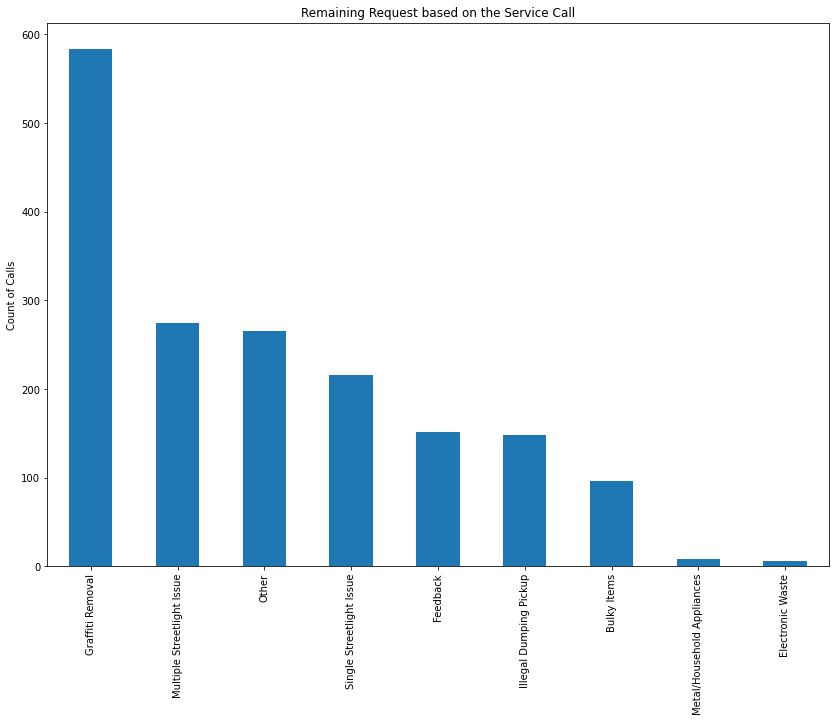

In [34]:
# Displaying the remaining open requests by the type of service.
m311_open['RequestType'].value_counts().plot(kind = 'bar', figsize = (14, 10))
plt.title('Remaining Request based on the Service Call')
plt.ylabel('Count of Calls')